
# <cap> Data Wine Exploration </cap>

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error as mse, accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data='winequality-red.csv'
wine=pd.read_csv(data)

#### Data Wrangling

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()
# No missing Value is observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Grouping Wine Quality into Low, Mid and High quality
qual_space=np.linspace(3,8,4)
level=['Low','Mid','High']
wine['quality-level']=pd.cut(wine['quality'],qual_space,labels=level, include_lowest=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mid


In [9]:
wine.describe(include='all').round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-level
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1319
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64,NaN
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81,NaN
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,NaN
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00,NaN
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00,NaN
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00,NaN


#### Data Visualization

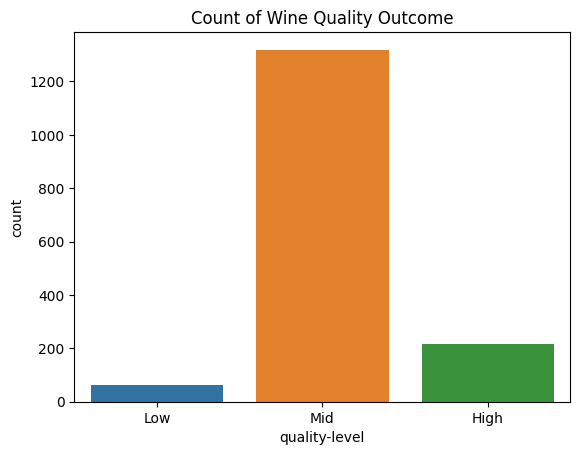

In [10]:
sns.countplot(data=wine,x='quality-level')
plt.title('Count of Wine Quality Outcome')
plt.show()

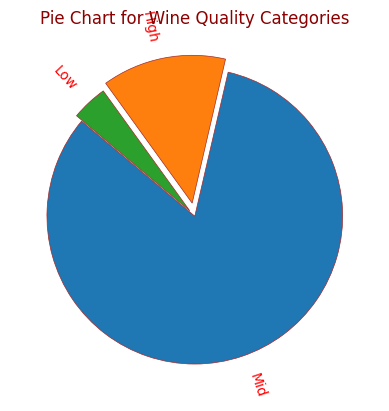

In [11]:
fig,ax=plt.subplots()
fig.patch.set_alpha(0)
ax.pie(wine['quality-level'].value_counts(),labels=wine['quality-level'].value_counts().index,startangle=140,rotatelabels=45,explode=(0,0.09,0.05),textprops={'color': 'red'}, wedgeprops={'linewidth': 0.5, 'edgecolor': 'brown'})
# plt.text(8,12,'Here we go',color='white', fontsize=12)
plt.title('Pie Chart for Wine Quality Categories',color='darkred')
plt.show()

In [22]:
import math
cols=wine.columns
cols=cols[:-2]
cols
# math.ceil(len(columns[:-1])/3)
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [23]:
wine.corr()['quality']

<ipython-input-23-cb536d97449e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()['quality']


fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

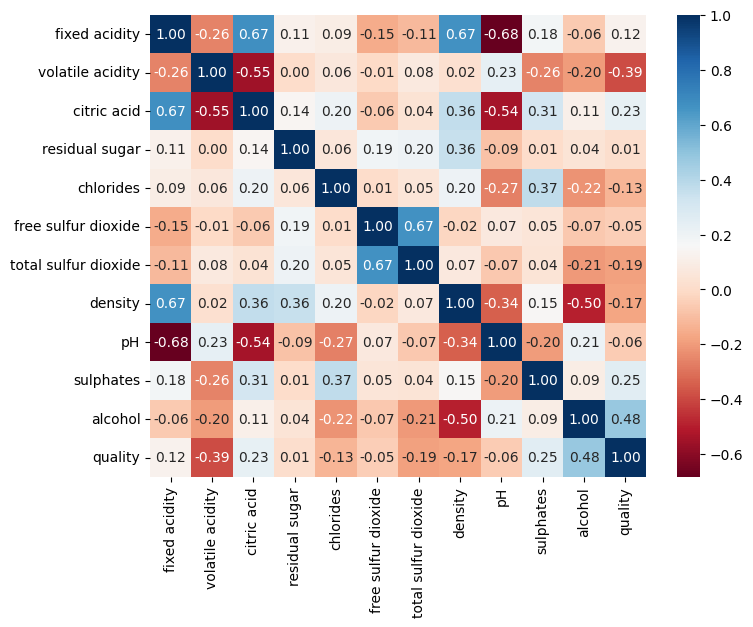

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(wine.select_dtypes('number').corr(),cmap='RdBu',annot=True,cbar=True,fmt='.2f')

plt.show()

In [25]:
ceil=math.ceil(len(cols[:-1])/3)
ceil

4

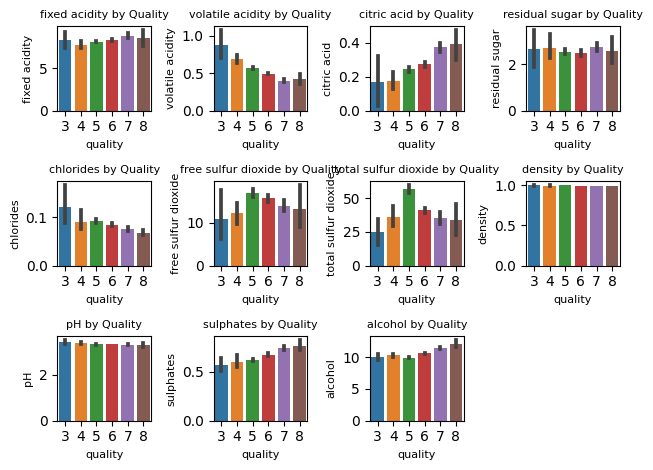

In [26]:
# Calculate the number of rows and columns needed based on the number of columns in cols
num_rows = math.ceil(len(cols) / 4)
num_cols = min(len(cols), 4)  # Use a maximum of 4 columns per row

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for index, col in enumerate(cols):
    # Plot the barplot on the current subplot
    sns.barplot(y=col, x='quality', data=wine, ax=axes[index])

    # Add titles to the subplots
    axes[index].set_title(f'{col} by Quality',fontsize=8)
    axes[index].set_xlabel('quality', fontsize=8)
    axes[index].set_ylabel(col, fontsize=8)

# Remove empty subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


From the wine bar plot visuals above and the correlation table, it is observed that some features dont have much imapct on the quality of the wine.As such the following will be dropped :

1.   Density
2.   Residual sugar


#### Splitting of Train/Test Samples

In [28]:
feat_=['quality','quality-level']
X=wine.drop(columns=feat_,axis=1)
y=wine['quality-level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=22,stratify=y)

In [29]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4
774,7.9,0.400,0.30,1.8,0.157,2.0,45.0,0.99727,3.31,0.91,9.5
320,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5


### Model Building

#### Label Encoding and Standardization of Features

In [30]:
scaler_=StandardScaler()
label_=LabelEncoder()
X_train_scaled=scaler_.fit_transform(X_train)
X_test_scaled=scaler_.fit_transform(X_test)
y_train_le=label_.fit_transform(y_train)
y_test_le=label_.fit_transform(y_test)

#### Decision Tree Classifier

In [31]:
param_grid={
    'max_depth':[6,10,13,15,18,20],
    'criterion':['gini','log_loss'],
    'max_features':["sqrt", "log2"]
}

In [32]:
DTC=DecisionTreeClassifier(random_state=3,splitter='best',max_depth=3)

In [38]:
grid_cv=GridSearchCV(DTC,param_grid,scoring='accuracy',cv=5)

In [39]:
grid_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=3),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [6, 10, 13, 15, 18, 20],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [40]:
grid_cv.best_params_,grid_cv.best_score_
# grid_cv.score(X_train,y_train)

({'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'},
 0.8311151960784313)

In [41]:
y_pred_decision=grid_cv.predict(X_test_scaled)
np.unique(y_pred_decision, return_counts=True)

(array(['High', 'Low', 'Mid'], dtype=object), array([ 44,  11, 265]))

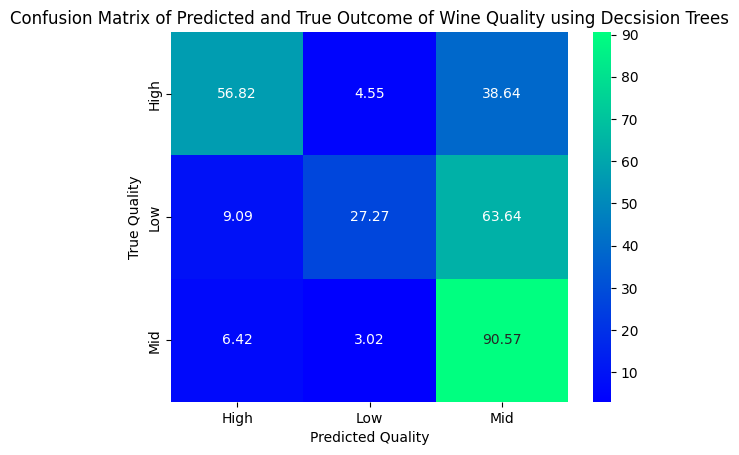

In [43]:
confi_dtc=confusion_matrix(y_pred_decision,y_test)
confi_dtc=confi_dtc/confi_dtc.sum(1)[:,np.newaxis]
sns.heatmap(confi_dtc*100,annot=True,cmap='winter',xticklabels=np.unique(wine['quality-level']),yticklabels=np.unique(wine['quality-level']),fmt='.2f')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.title('Confusion Matrix of Predicted and True Outcome of Wine Quality using Decsision Trees')
plt.show()

#### XGBoost Classifier

In [44]:
xgb=XGBClassifier(random_state=7)

In [45]:
param_grid={
    'max_depth':[6,10,13,15,18,20,30,50,80,110]
}
np.unique(y_train_le)

array([0, 1, 2])

In [46]:
xgb_cv=GridSearchCV(xgb,param_grid,cv=6, scoring='accuracy')
xgb_cv.fit(X_train_scaled, y_train_le)

GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=7, ...),
             param_grid={'max_depth': [6, 10, 13, 15, 18, 20, 30, 50, 80, 110]},
             scoring='accuracy')

In [47]:
# criterion='gini'
# max_depth= 10
# max_features='sqrt'
xgb_cv.best_params_,xgb_cv.best_score_

({'max_depth': 18}, 0.8577033331870768)

In [48]:
y_pred_xgb=xgb_cv.predict(X_test_scaled)
accuracy_score(y_test_le,y_pred_xgb)
y_pred_xgb[:5]

array([2, 2, 0, 2, 2])

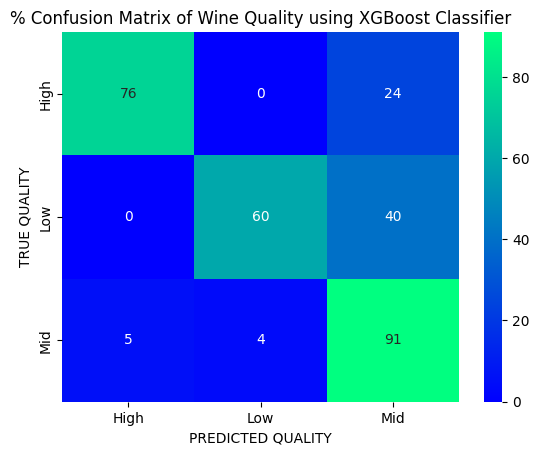

In [49]:
cm_xgb=confusion_matrix(y_pred_xgb,y_test_le)
cm_xgb_sum = np.sum(cm_xgb, axis=1)
cm_xgb_sum[cm_xgb_sum==0]=1
cm_xgb=(cm_xgb/cm_xgb_sum[:,np.newaxis])*100
# cm_xgb
sns.heatmap(cm_xgb,cmap='winter',annot=True,xticklabels=np.unique(y_test.values),yticklabels=np.unique(y_test.values),fmt='.0f')
plt.xlabel('PREDICTED QUALITY')
plt.ylabel('TRUE QUALITY')
plt.title('% Confusion Matrix of Wine Quality using XGBoost Classifier')
plt.show()

#### KNearest Neighbor

In [50]:
knn1=KNeighborsClassifier()

In [51]:
param_grid={
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'], # Weighting of neighbors (uniform or distance-based)
    'n_neighbors': list(range(4,8,1)),   # Different values of k
    'metric': ['euclidean', 'manhattan']
}

In [52]:
knn_gcv=GridSearchCV(knn1,param_grid,cv=6,scoring='accuracy')
knn_gcv.fit(X_train_scaled,y_train)
knn_gcv.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 6,
 'weights': 'distance'}

In [ ]:
from sklearn import metrics
metrics.get_scorer_names()

In [54]:
knn_use=KNeighborsClassifier(algorithm= 'auto',
 metric= 'euclidean', n_neighbors= 7,weights='distance')
knn_use.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [55]:
y_knn_pred=knn_use.predict(X_test_scaled)
# knn_use.predict_proba(X_test_scaled)
accuracy_score(y_knn_pred,y_test)

0.871875

In [56]:
confusion_knn=confusion_matrix(y_test,y_knn_pred)
confusion_knn=(confusion_knn/confusion_knn.sum(1)[:,np.newaxis])*100

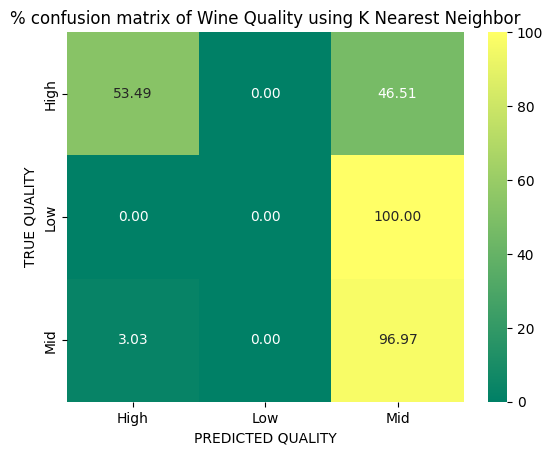

In [57]:
sns.heatmap(confusion_knn,cmap='summer',annot=True,xticklabels=np.unique(y_test.values),yticklabels=np.unique(y_test.values),fmt='.2f')
plt.xlabel('PREDICTED QUALITY')
plt.ylabel('TRUE QUALITY')
plt.title('% confusion matrix of Wine Quality using K Nearest Neighbor')
plt.show()

In [58]:
from sklearn.metrics import classification_report

In [59]:
pprint(classification_report(y_pred_xgb ,y_test_le))

Pretty printing has been turned OFF


In [ ]:
cross_val_score(estimator=xgb_cv,X=X_train_scaled,y=y_train_le,cv=5).mean()

Out of all the ML models used it is observed that the** XGB model** is the best too be considered as it has a model accuracy of more than 80 percent and it predicts most of the data accuratly.